In [1]:
import os
import helper_functions as helpers

from FlowCytometryTools import FCMeasurement

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
#from matplotlib.patches import Rectangle
import scipy as sp

In [2]:
filenames = os.listdir('data')

In [3]:
# Sort FCS filenames by strain
wells = [name.split('_')[3] for name in filenames]

files_yCS02a = []
files_yMG01a = []
files_yCS03a = []
for i, well in enumerate(wells):
    if well[1:] >= '07':
        files_yCS03a.append(filenames[i])
    elif well[1:] >= '04':
        files_yMG01a.append(filenames[i])
    elif (well[0] >= 'C') and well != 'C02':
        files_yCS02a.append(filenames[i])

print(files_yCS02a)
print(files_yCS03a)
print(files_yMG01a)

['Specimen_001_C1_C01_001.fcs', 'Specimen_009_D3_D03_003.fcs', 'Specimen_009_D2_D02_002.fcs', 'Specimen_009_E2_E02_002.fcs', 'Specimen_009_E3_E03_003.fcs', 'Specimen_009_C3_C03_003.fcs', 'Specimen_002_D1_D01_001.fcs', 'Specimen_002_E1_E01_001.fcs']
['Specimen_007_D11_D11_005.fcs', 'Specimen_007_B12_B12_006.fcs', 'Specimen_007_B11_B11_005.fcs', 'Specimen_007_D10_D10_004.fcs', 'Specimen_007_C12_C12_006.fcs', 'Specimen_007_B10_B10_004.fcs', 'Specimen_007_D12_D12_006.fcs', 'Specimen_007_C11_C11_005.fcs', 'Specimen_007_D8_D08_002.fcs', 'Specimen_006_D7_D07_001.fcs', 'Specimen_007_C8_C08_002.fcs', 'Specimen_007_B9_B09_003.fcs', 'Specimen_007_C9_C09_003.fcs', 'Specimen_006_C7_C07_001.fcs', 'Specimen_006_B7_B07_001.fcs', 'Specimen_007_B8_B08_002.fcs', 'Specimen_007_C10_C10_004.fcs', 'Specimen_007_D9_D09_003.fcs']
['Specimen_005_G4_G04_008.fcs', 'Specimen_010_F5_F05_002.fcs', 'Specimen_010_G5_G05_004.fcs', 'Specimen_004_H4_H04_009.fcs', 'Specimen_010_H6_H06_007.fcs', 'Specimen_003_F4_F04_001.fc

C01


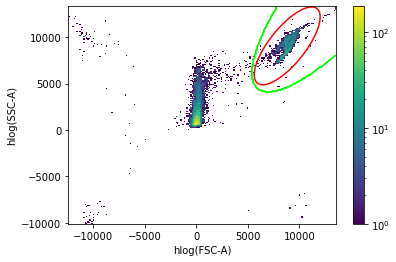

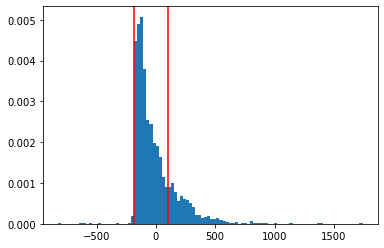

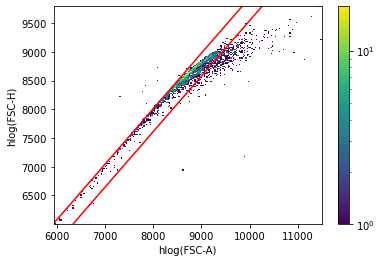

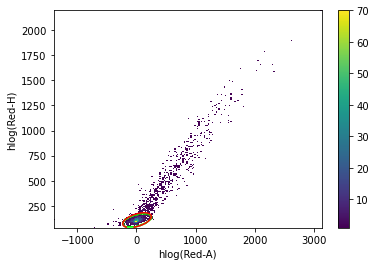

D03


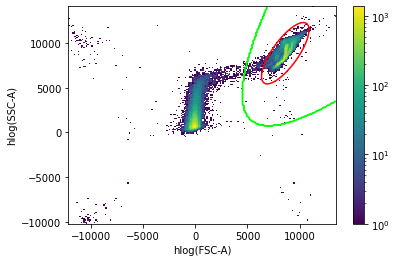

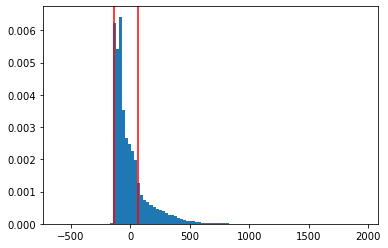

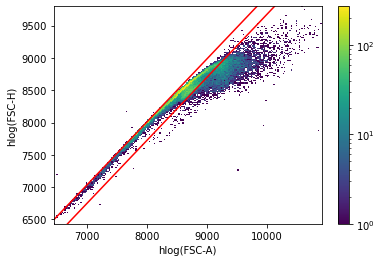

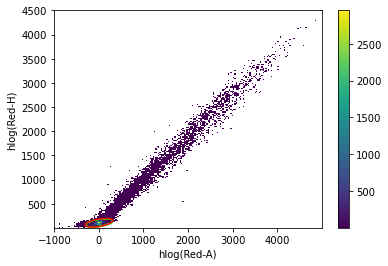

D02


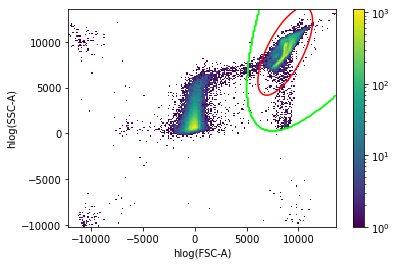

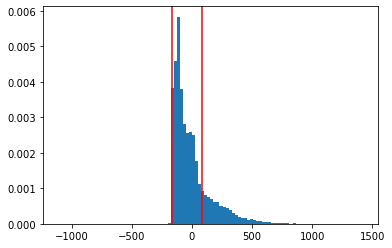

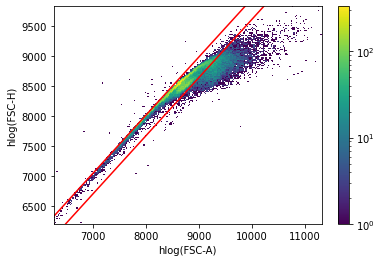

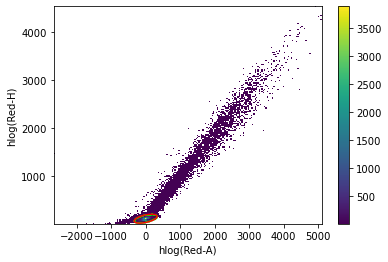

E02


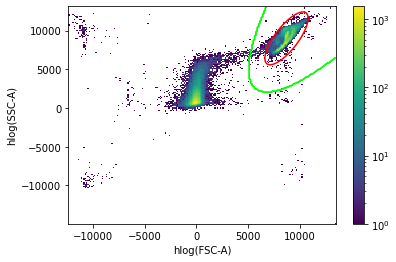

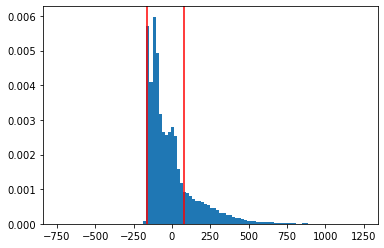

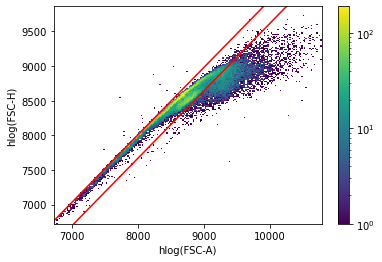

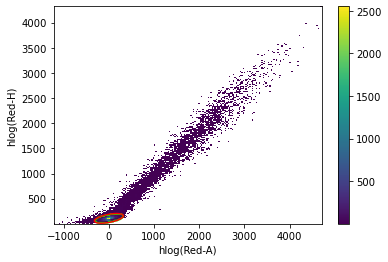

E03


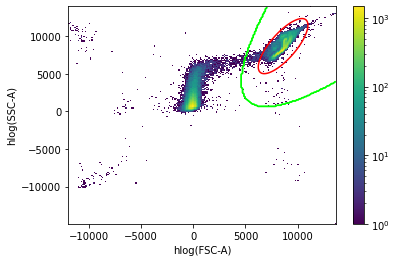

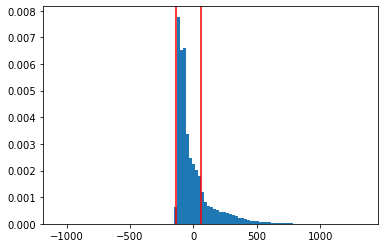

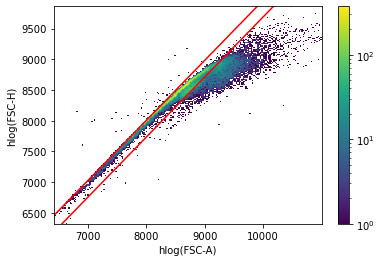

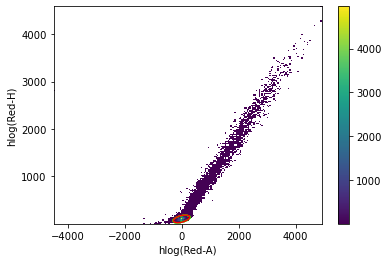

C03


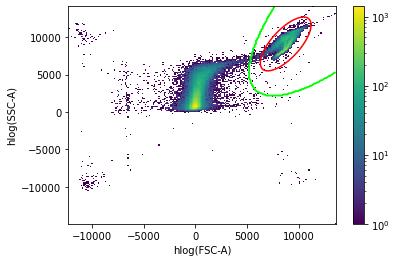

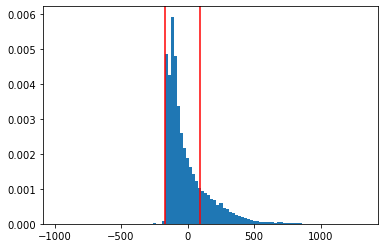

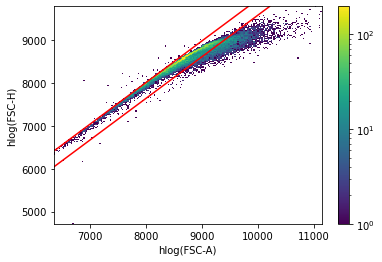

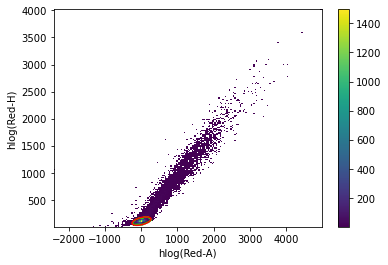

D01


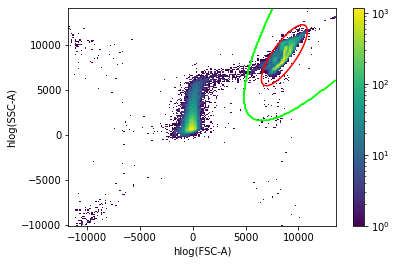

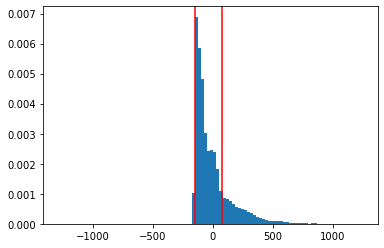

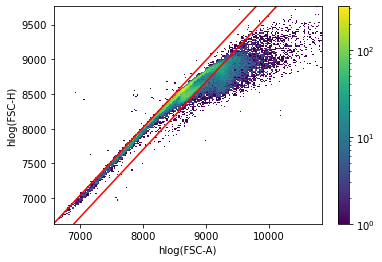

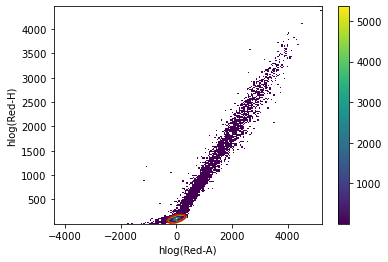

E01


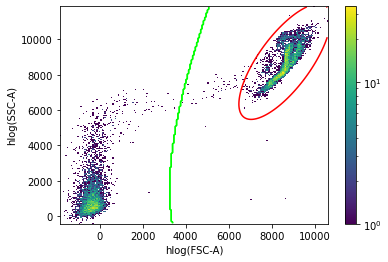

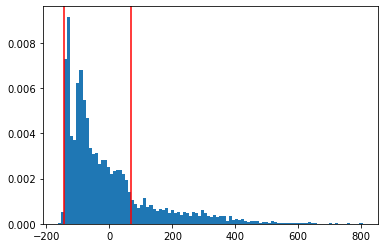

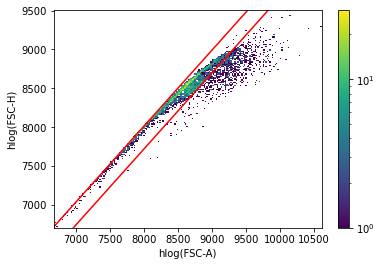

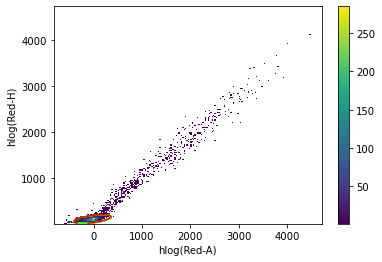

In [4]:
# Cell gate all yCS02a wells
# Find out which row is which treatment
yCS02a_treat = {'C' : '22hrs', 'D' : '7hrs', 'E' : 'None'}

fluor_col = np.array([])
strain_col = np.array([])
treat_col = np.array([])
well_col = np.array([])

for filename in files_yCS02a:
    well = filename.split('_')[3]
    print(well)
    fcs = FCMeasurement(well, 'data/'+filename)
    fcs_hlog = fcs.transform('hlog')
    df = fcs_hlog.data
    cell_gate = helpers.gate_cells(df, 2, p=0.99)
    singlet_gate = helpers.gate_singlets(df, cell_gate, p_left=5e-3, p_right=0.8)
    alive_gate = helpers.gate_alive(df, 2, singlet_gate, p=1)
    
    # Create columns
    fluor = fcs['Alexa Fluor 488-A'].values
    fluor = fluor[alive_gate & (fluor > 0)]
    N = fluor.size
    fluor_col = np.append(fluor_col, fluor)
    treat_col = np.append(treat_col, np.repeat(yCS02a_treat[well[0]], N))
    strain_col = np.append(strain_col, np.repeat('yCS02a', N))
    well_col = np.append(well_col, np.repeat(well, N))

yCS02a_df = pd.DataFrame(np.column_stack((strain_col, treat_col, well_col, fluor_col)), 
             columns=['Strain', 'Auxin', 'Well', 'Intensity'])
    

In [4]:
# Save gated data in between
#yCS02a_df.to_csv('yCS02a_df.csv')
yCS02a_df = pd.read_csv('yCS02a_df.csv')

G04


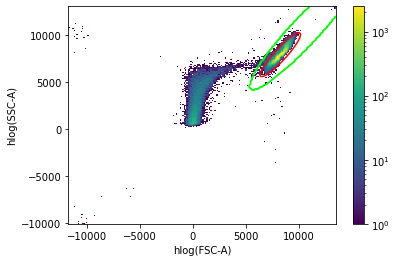

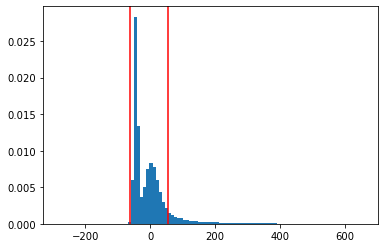

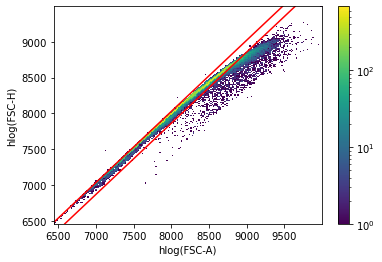

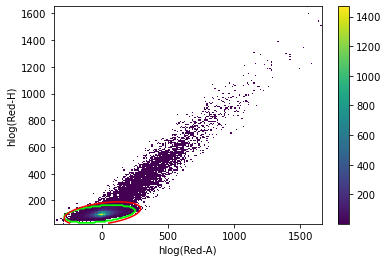

F05


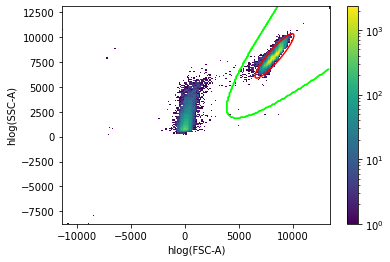

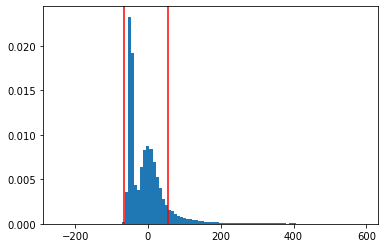

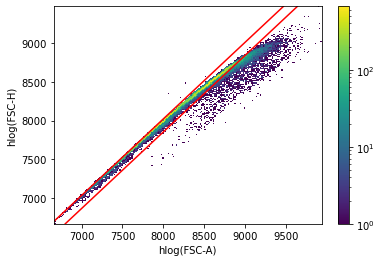

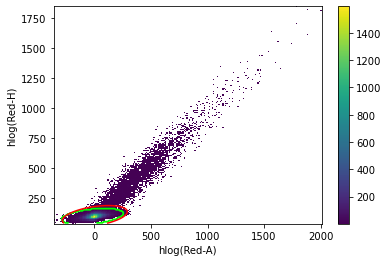

G05


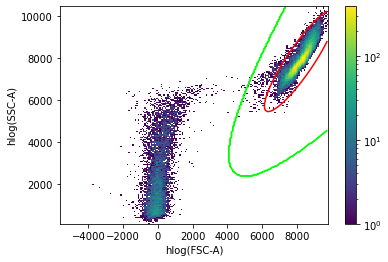

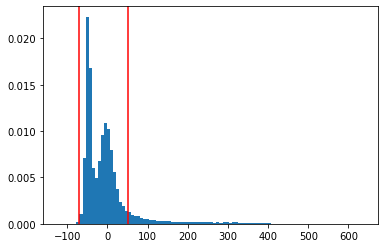

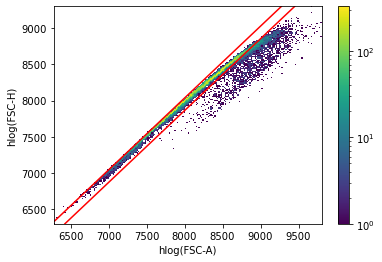

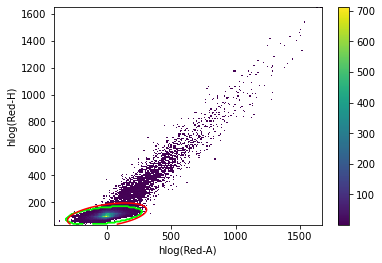

H04


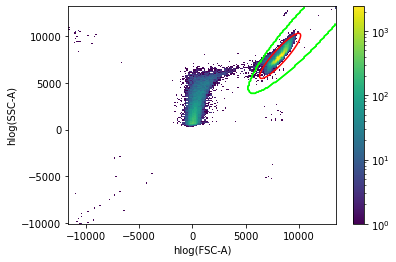

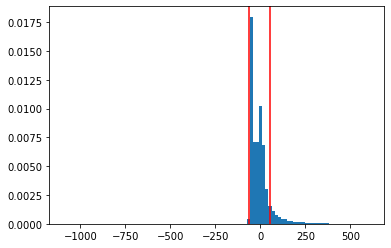

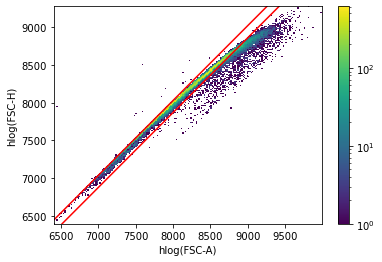

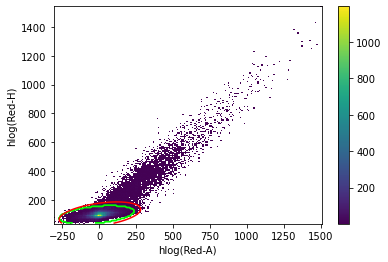

H06


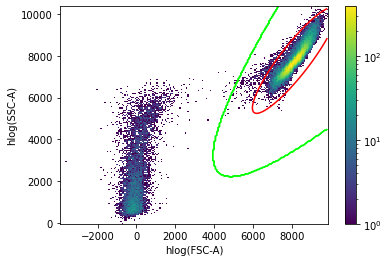

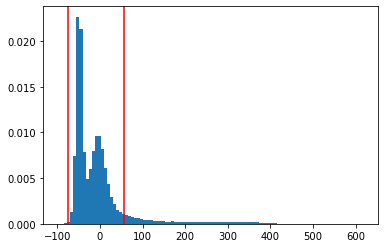

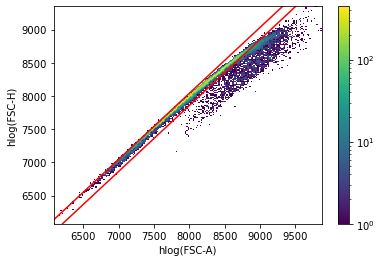

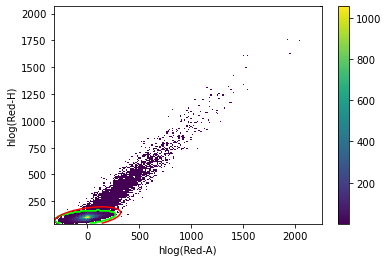

F04


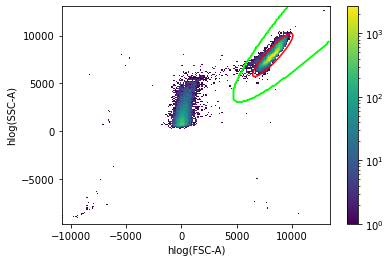

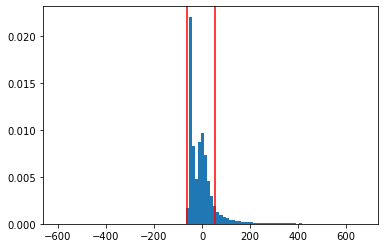

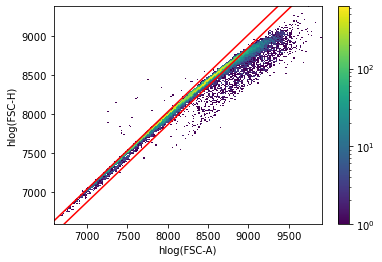

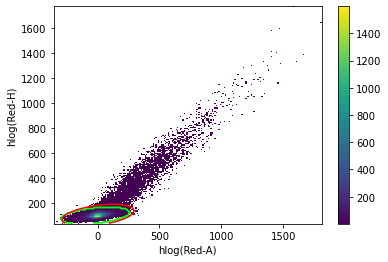

F06


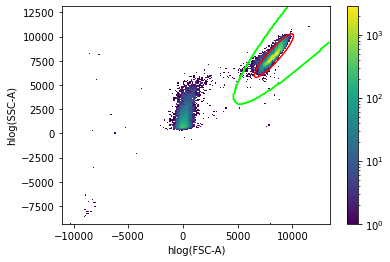

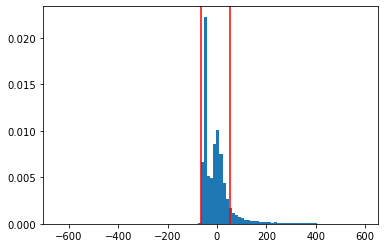

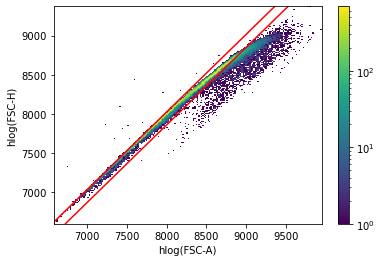

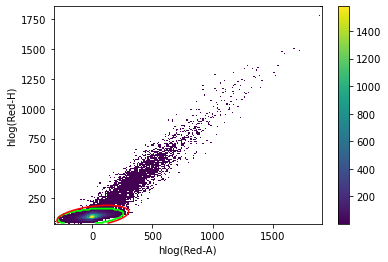

G06


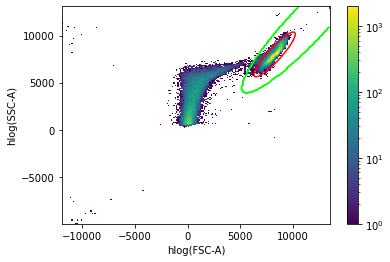

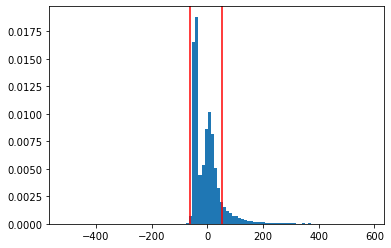

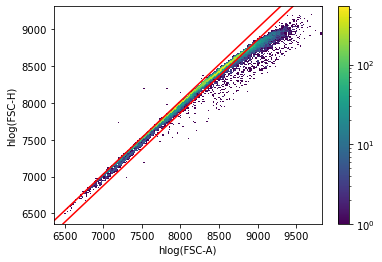

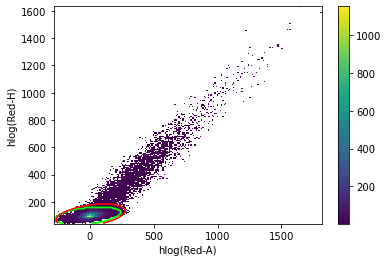

H05


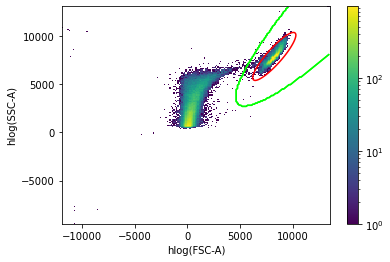

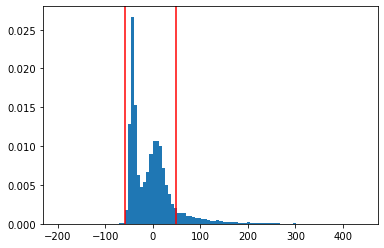

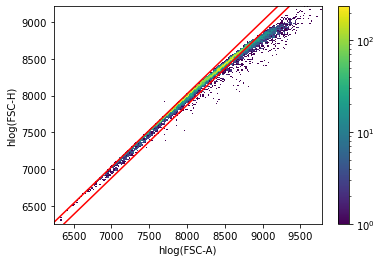

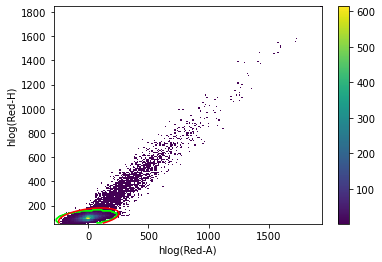

In [5]:
# Cell gate all yMG01a wells
# Find out which row is which treatment
yMG01a_treat = {'F' : '22hrs', 'G' : '7hrs', 'H' : 'None'}

fluor_col = np.array([])
strain_col = np.array([])
treat_col = np.array([])
well_col = np.array([])

for filename in files_yMG01a:
    well = filename.split('_')[3]
    print(well)
    fcs = FCMeasurement(well, 'data/'+filename)
    fcs_hlog = fcs.transform('hlog')
    df = fcs_hlog.data
    cell_gate = helpers.gate_cells(df, 2, p=0.99)
    singlet_gate = helpers.gate_singlets(df, cell_gate, p_left=1e-3, p_right=0.9)
    alive_gate = helpers.gate_alive(df, 2, singlet_gate, p=1)
    
    # Create columns
    fluor = fcs['Alexa Fluor 488-A'].values
    fluor = fluor[alive_gate & (fluor > 0)]
    N = fluor.size
    fluor_col = np.append(fluor_col, fluor)
    treat_col = np.append(treat_col, np.repeat(yMG01a_treat[well[0]], N))
    strain_col = np.append(strain_col, np.repeat('yMG01a', N))
    well_col = np.append(well_col, np.repeat(well, N))

yMG01a_df = pd.DataFrame(np.column_stack((strain_col, treat_col, well_col, fluor_col)), 
             columns=['Strain', 'Auxin', 'Well', 'Intensity'])

In [5]:
# Save gated data in between
#yMG01a_df.to_csv('yMG01a_df.csv')
yMG01a_df = pd.read_csv('yMG01a_df.csv')

D11


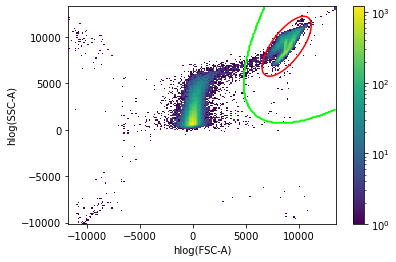

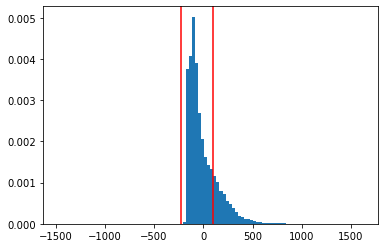

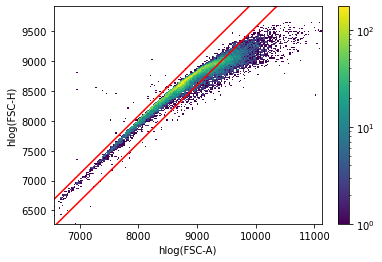

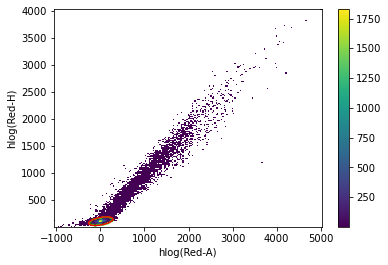

B12


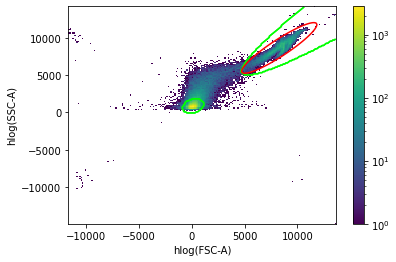

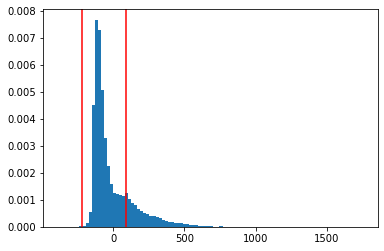

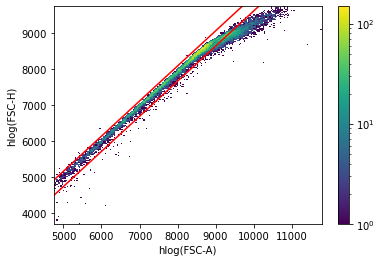

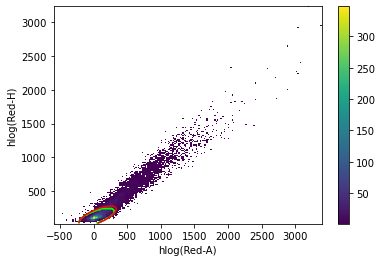

B11


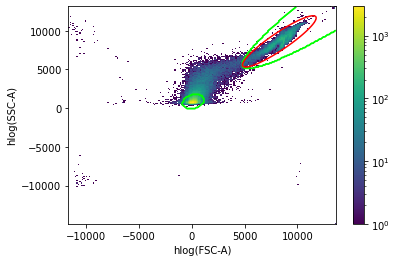

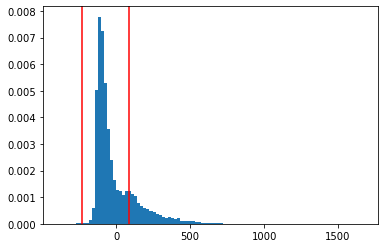

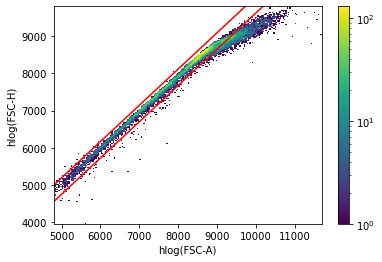

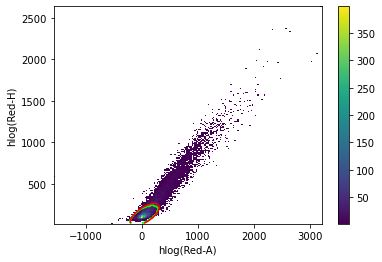

D10


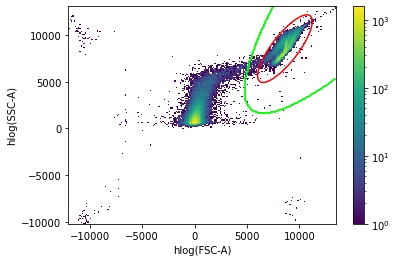

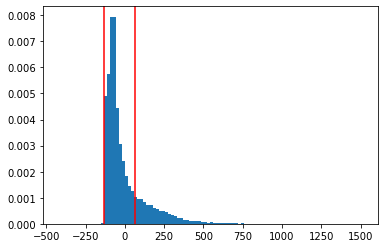

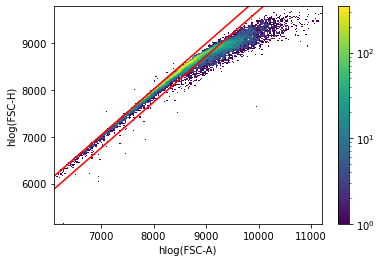

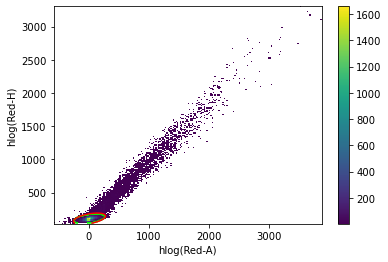

C12


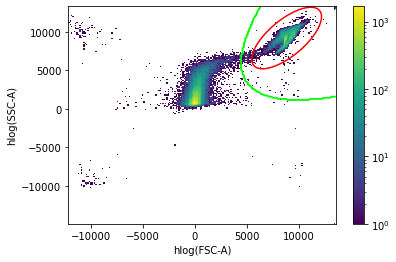

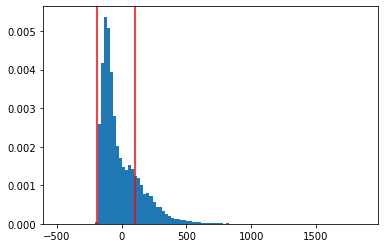

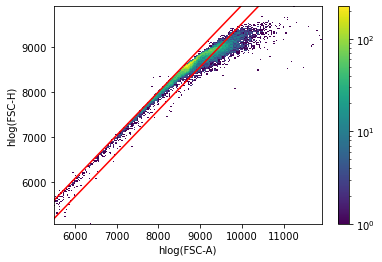

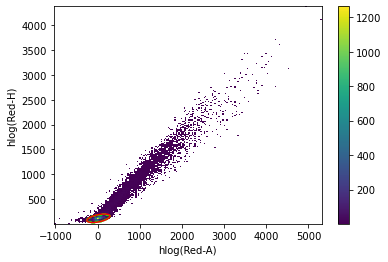

B10


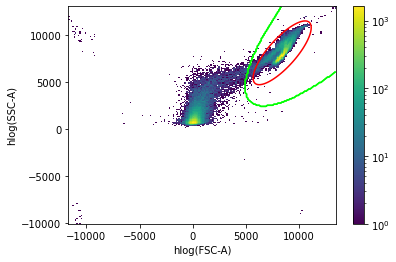

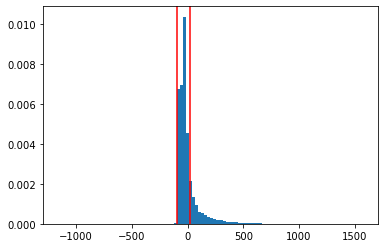

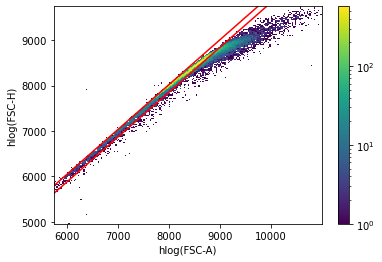

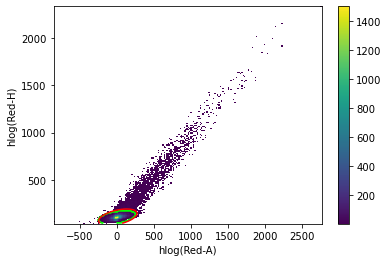

D12


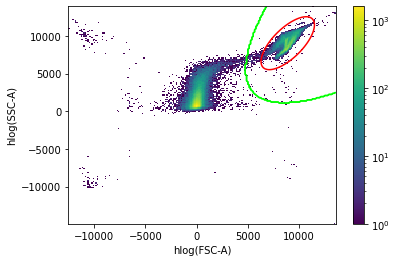

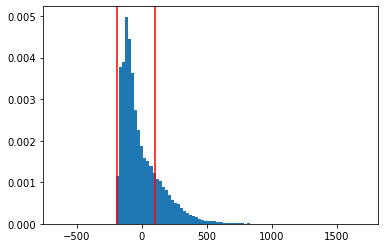

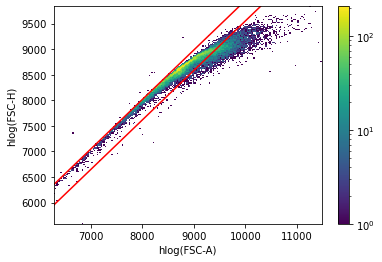

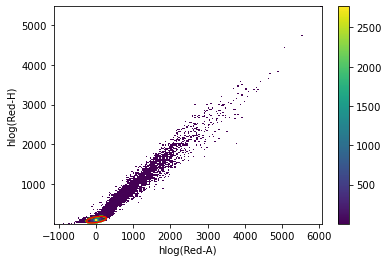

C11


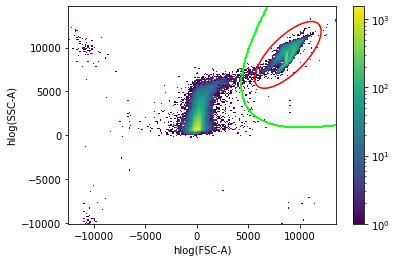

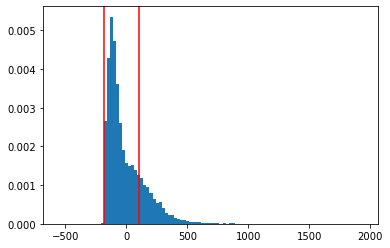

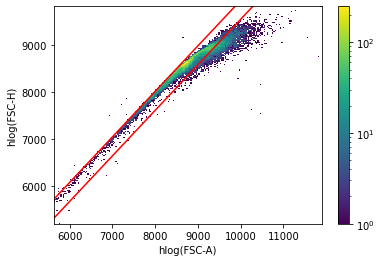

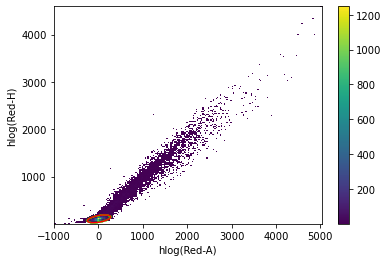

D08


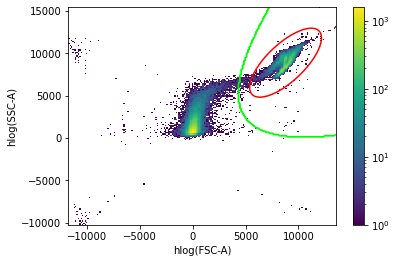

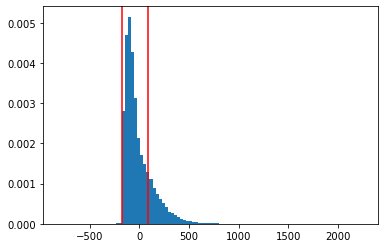

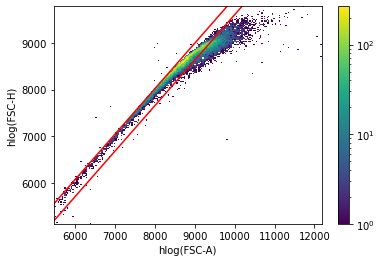

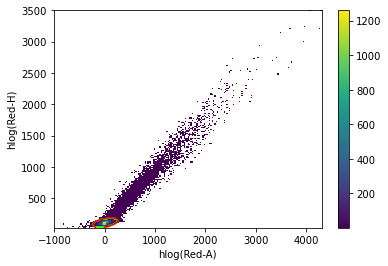

D07


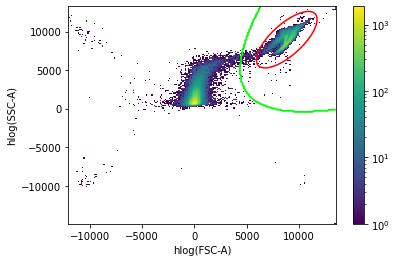

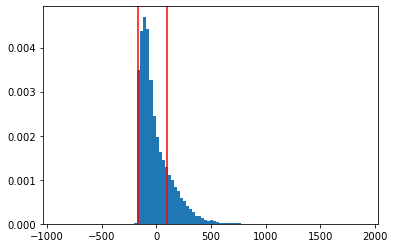

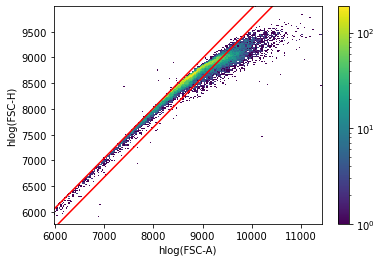

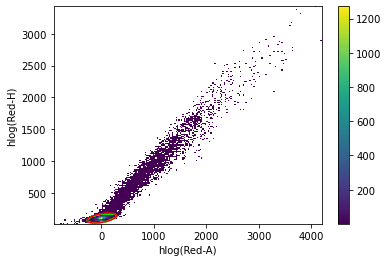

C08


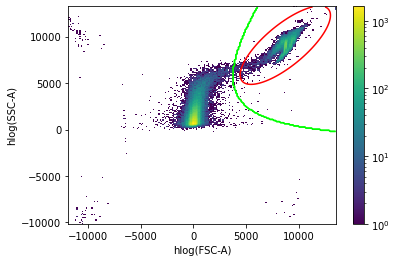

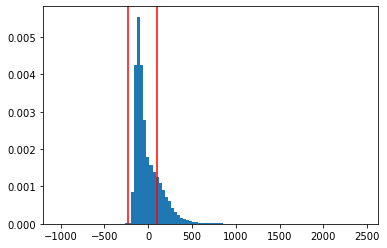

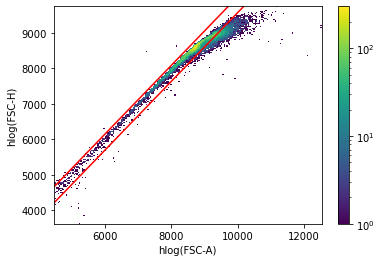

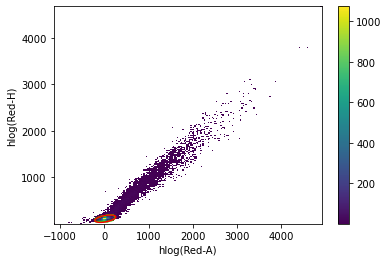

B09


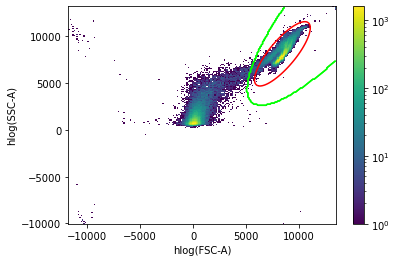

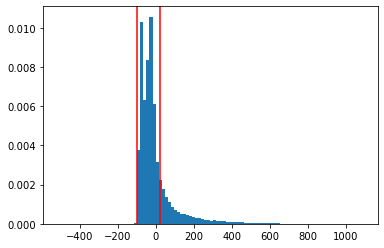

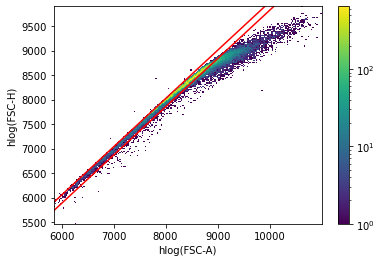

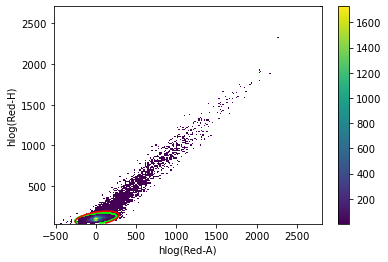

C09


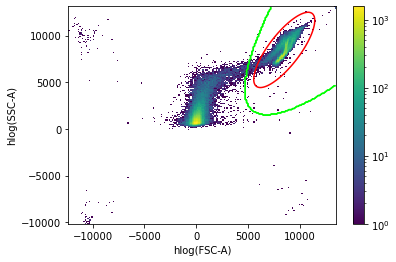

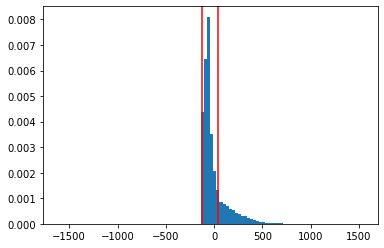

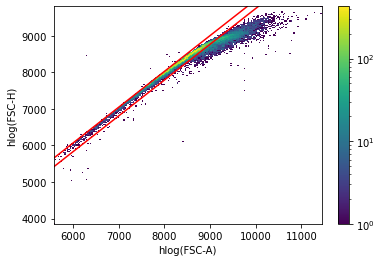

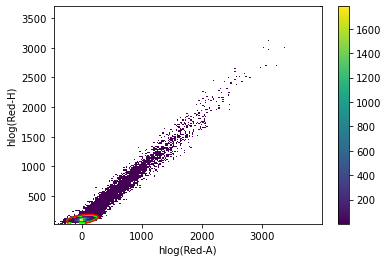

C07


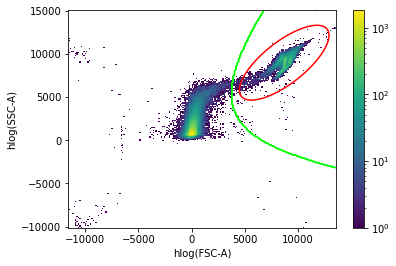

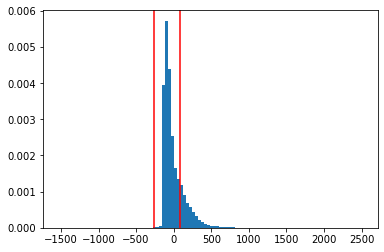

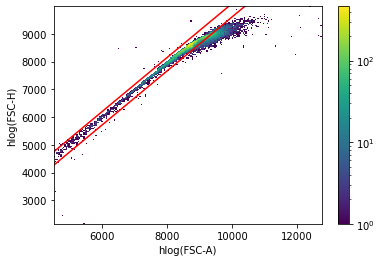

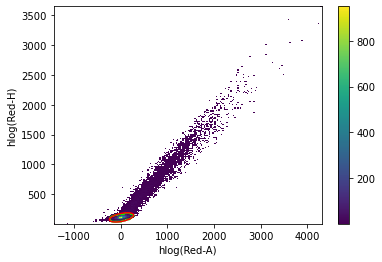

B07


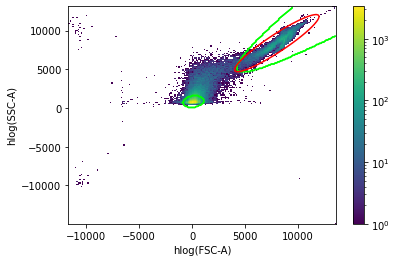

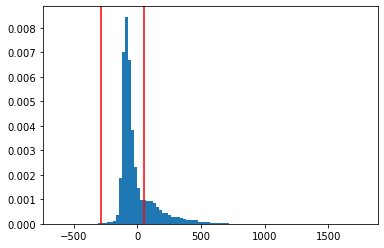

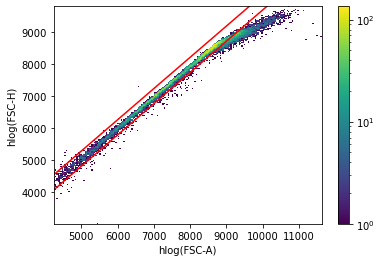

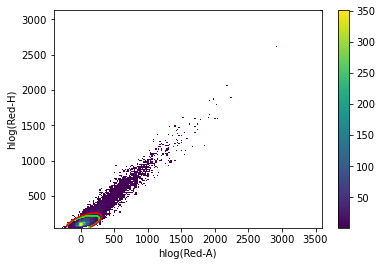

B08


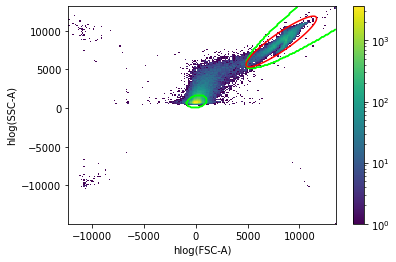

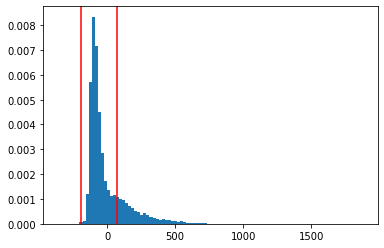

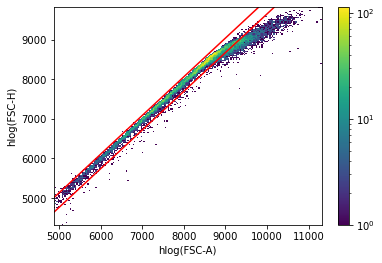

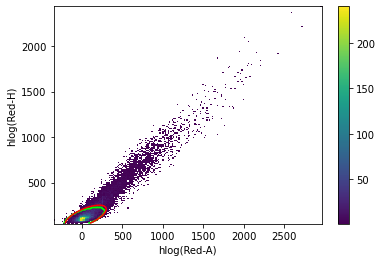

C10


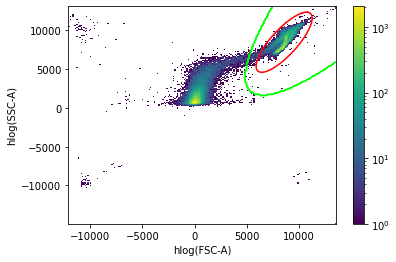

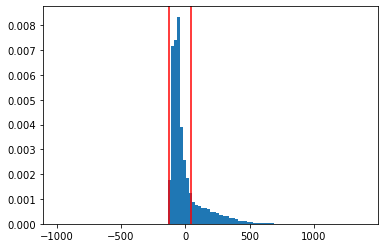

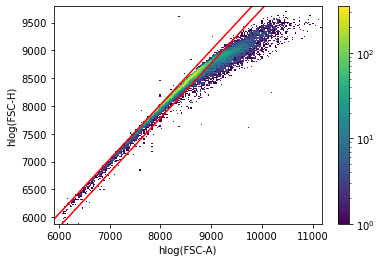

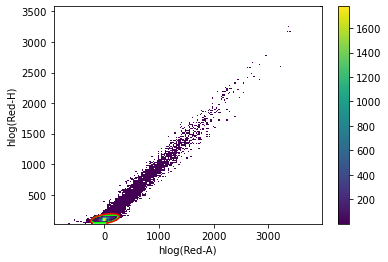

D09


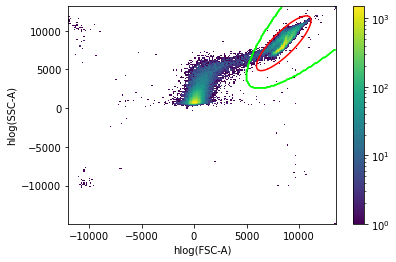

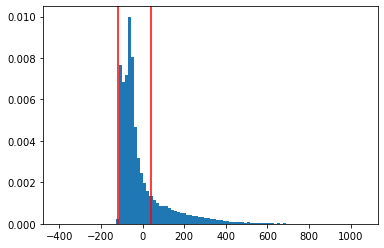

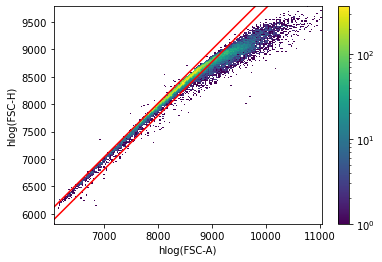

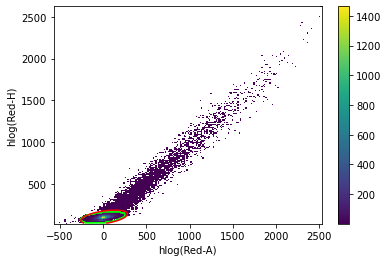

In [6]:
# Cell gate all yCS03a wells
# Find out which row is which treatment
yCS03a_treat = {'B' : '22hrs', 'C' : '7hrs', 'D' : 'None'}

fluor_col = np.array([])
strain_col = np.array([])
treat_col = np.array([])
well_col = np.array([])

for filename in files_yCS03a:
    well = filename.split('_')[3]
    print(well)
    fcs = FCMeasurement(well, 'data/'+filename)
    fcs_hlog = fcs.transform('hlog')
    df = fcs_hlog.data
    if well in ['B07', 'B08', 'B11', 'B12']:
        cell_gate_clust = 3
    else:
        cell_gate_clust = 2
    cell_gate = helpers.gate_cells(df, nclust=cell_gate_clust, p=0.99)
    singlet_gate = helpers.gate_singlets(df, cell_gate, p_left=1e-3, p_right=0.8)
    alive_gate = helpers.gate_alive(df, 2, singlet_gate, p=1)
    #cell_gate = helpers.gate_cells(df, 2, p=0.99)
    #singlet_gate = helpers.gate_singlets(df, cell_gate, p_left=1e-3, p_right=0.8)
    #alive_gate = helpers.gate_alive(df, 3, singlet_gate, p=1)
    
    
    
    # Create columns
    fluor = fcs['Alexa Fluor 488-A'].values
    fluor = fluor[alive_gate & (fluor > 0)]
    N = fluor.size
    fluor_col = np.append(fluor_col, fluor)
    treat_col = np.append(treat_col, np.repeat(yCS03a_treat[well[0]], N))
    strain_col = np.append(strain_col, np.repeat('yCS03a', N))
    well_col = np.append(well_col, np.repeat(well, N))

yCS03a_df = pd.DataFrame(np.column_stack((strain_col, treat_col, well_col, fluor_col)), 
             columns=['Strain', 'Auxin', 'Well', 'Intensity'])

In [6]:
# Save gated data in between
#yCS03a_df.to_csv('yCS03a_df.csv')
yCS03a_df = pd.read_csv('yCS03a_df.csv')

None
1.4496641993265558 2598.0009587115396


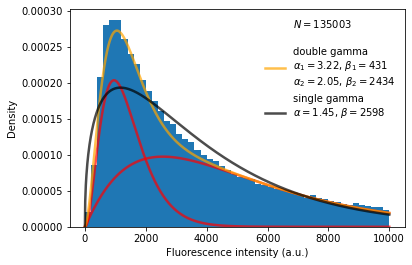

7hrs
1.2859879511788637 3240.126387080465


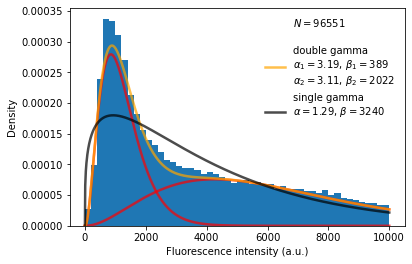

22hrs
1.3634223901768876 1474.8758022097506


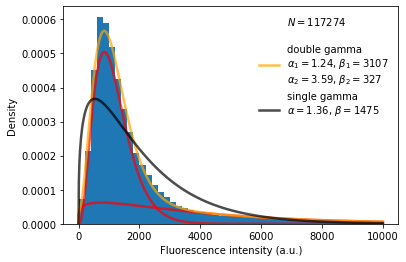

In [7]:
def plot_intensities(Y, xmax, random_state=None, name='', save=False):
    
    fig = plt.figure()
    ax = fig.add_subplot()
    plt.hist(Y[Y <= xmax], bins=50, density=True, range=(0,xmax))

    x = np.linspace(0, xmax, 1001)
    
    N = Y.size
    plt.plot((0,0), label=r'$N = {}$'.format(N)+'\n', alpha=0)
    
    # First double fit
    w, alpha, beta = helpers.gamma_mixture(Y, ncomp=2, tol=1e-3, verbose=False, random_state=random_state)
    
    y = np.zeros((x.size, 2))
    ylabel = []
    for i in range(2):
        y[:,i] = w[i]*helpers.stats.gamma.pdf(x, a=alpha[i], scale=beta[i])
        plt.plot(x, y[:, i], lw=2.5, c='red', alpha=0.7)
    
    # Find component with the highest mode
    idx = list(np.argsort((alpha-1)*beta))
    
    values = list(zip(alpha[idx], beta[idx]))
    
    label_double = ('double gamma\n'+r'$\alpha_1={:0.2f}$, $\beta_1={:.0f}$'.format(*values[0])+
                    '\n'+r'$\alpha_2={:0.2f}$, $\beta_2={:.0f}$'.format(*values[1]))
    plt.plot(x, np.sum(y, axis=1), lw=2.5, c='orange', label=label_double, alpha=0.7)

    # then single fit
    w, alpha, beta = helpers.gamma_mixture(Y, ncomp=1, tol=1e-2, verbose=False)
    y1 = helpers.stats.gamma.pdf(x, a=alpha, scale=beta)
    
    label_single = 'single gamma\n'+r'$\alpha={:0.2f}$, $\beta={:.0f}$'.format(alpha, beta)+'\n'
    plt.plot(x, y1, lw=2.5, c='black', label=label_single, alpha=0.7)
    
    plt.xlabel('Fluorescence intensity (a.u.)')
    plt.ylabel('Density')
    
    plt.legend(frameon=False)
    
    if save:
        plt.savefig(name+'.pdf')
    

    plt.show()





df = yCS03a_df
df['Intensity'] = pd.to_numeric(df['Intensity'])
n = df.shape[0]

for auxin in ['None', '7hrs', '22hrs']: 
    
    Y = df.loc[df['Auxin'] == auxin]['Intensity'].values
    
    plot_intensities(Y, xmax=10000, random_state=None, name='yCS03a_10k'+auxin, save=False)
    
    #plt.hist(np.log(Y),bins=100)
    #plt.show()
    